## Intermediate Data Science

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)

## Time Series Data

Time series are a form of data that are common in many fields: Economics, Finance, Ecology, Neuroscience, Physics, and Applied Math. Any data that is recorded at many points over time, with a certain frequency of observations, is time series data. Time plays an important role in the data - maybe you want to know how observations change over time. 

- *Fixed Frequency* observations are recorded at a fixed interval. The intervals are regular and time steps consistent.
- *Irregular* observations do not have a fixed interval, although time is recorded and could be important to your analysis.

There are many ways that you might mark time series data:

- **Timestamps** time marked by recording specific instants in time.
- **Fixed Periods** time marked by recording the month or the year.
- **Intervals of Time** mark both a start and end timestamp.
- **Experimental or Elapsed Time** time as recorded relative to a start time.

We will mostly explore timestamps, since the other types can usually be converted into timestamps.

In [64]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

## Date and Time Tools

We will start by exploring tools that are available for interacting with dates and times. We will look at the datetime package. 

In [66]:
from datetime import datetime

In [68]:
# Lets look at how time is recorded
now = datetime.now()
print(now)

2025-11-10 15:26:19.271678


We see the format is year, month, day, hour, minute, second, microsecond. We can access items from this datetime object. Try now. and press the tab button!

In [70]:
now.year

2025

In [72]:
now.day

10

In [74]:
now.month

11

Once you have a datetime object you can do operations like addition and subtraction.

**How long have you been alive?**

In [78]:
my_birthday = datetime(1979,2,7)
my_birthday

datetime.datetime(1979, 2, 7, 0, 0)

In [76]:
my_life = now-my_birthday
my_life

datetime.timedelta(days=17078, seconds=55579, microseconds=271678)

## You Try

Write a python **function** that takes as an input a birth date and outputs how old the person is in just years, by using the datetime functionality.

In [80]:
# Your code here
def birth_day():
    birthday = input('Please enter your birthday (YYYY-MM-DD)')
    year, month, day = birthday.split('-')
    year = int(year)
    month = int(month) 
    day = int(day) 

    birth_date = datetime(year,month,day)
    now = datetime.now()
    calculation = now.year - birth_date.year
    print(f'You are {calculation} years old')
birth_day()

Please enter your birthday (YYYY-MM-DD) 120102


ValueError: not enough values to unpack (expected 3, got 1)

## You can add or subtract a `timedelta` to shift a datetime object or create a series of datetimes.

In [82]:
from datetime import timedelta
# timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

start = datetime(2025,9,3,1,15)
print(start)
delta = timedelta(hours=1,minutes=5)
print(delta)
print(start+delta)

2025-09-03 01:15:00
1:05:00
2025-09-03 02:20:00


In [84]:
# You can quickly generate lists of time data
delta = timedelta(days=1)
days_of_year = [datetime(2025,1,1)]

for i in range(30):
    days_of_year.append(days_of_year[-1]+delta)

## days_of_year

In [88]:
delta = timedelta(years=1)
days_of_year()

TypeError: 'years' is an invalid keyword argument for __new__()

## Converting Strings

Often when you read in data from a .csv the data will be in the string format. You can go back and forth between datetime objects and strings.

In [90]:
dt = datetime(2000,1,1)

# The str() command can convert data into strings
str(dt)

'2000-01-01 00:00:00'

In [92]:
# You can also format the strings
'''
%Y year
%y two digit year
%m month
%d day

There are lots of these! - see book pate 359
'''

dt.strftime("%m-%d-%Y")

'01-01-2000'

In [94]:
# Start with a string
str_date = '1-1-2000'

# You have to use the string formatting commands to tell date time how the string is formatted
# so it can strip out the parts correctly
datetime.strptime(str_date, "%m-%d-%Y")

datetime.datetime(2000, 1, 1, 0, 0)

## Time Series Basics

We will load in some weather data so we can explore how to deal with time series data. We will stet the index to be time series data so that we can explore how we might "slice" or subset time.

In [96]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parthdande/timeseries-weather-dataset")

print("Path to dataset files:", path)

print(os.listdir(path))

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/parthdande/timeseries-weather-dataset/versions/2
['Weather_dataset.csv', 'Weather_Data_1980_2024(hourly).csv']


In [98]:
df = pd.read_csv(path+'/'+'Weather_Data_1980_2024(hourly).csv')
df.head(5)

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
0,1980-01-01T00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1,1980-01-01T01:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
2,1980-01-01T02:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
3,1980-01-01T03:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
4,1980-01-01T04:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1


In [260]:
# Notice that the objects in the time column are strings
df['time'].iloc[0]

'1980-01-01T00:00'

In [100]:
df.dtypes

time                              object
temperature                      float64
relative_humidity                  int64
dew_point                        float64
precipitation (mm)               float64
rain (mm)                        float64
snowfall (cm)                      int64
pressure_msl (hPa)               float64
surface_pressure (hPa)           float64
cloud_cover (%)                    int64
cloud_cover_low (%)                int64
cloud_cover_mid (%)                int64
cloud_cover_high (%)               int64
vapour_pressure_deficit (kPa)    float64
wind_speed_10m (km/h)            float64
wind_direction                     int64
is_Day                             int64
dtype: object

In [26]:
# Change the times to datetime objects
# Save them as the index for the data frame.
def string_to_time(x):
    '''
    A function to return a datetime striped from the format:
    
    '1980-01-01T00:00'
    
    '''
    return datetime.strptime(x,'%Y-%m-%dT%H:%M')


# Set the index using the time column and a lambda    
df.index = df['time'].apply(lambda x: string_to_time(x))
# Convert the time to datetime
df['time'] = df['time'].apply(lambda x: string_to_time(x))
df

NameError: name 'df' is not defined

In [36]:
# Let's look at the data again
df['time'].iloc[0]

NameError: name 'df' is not defined

Notice that now we have a Timestamp object. Timestamps are a Pandas/Numpy object, basically what happens is when you send a datetime into pandas it interprets it as a Timestamp. We saw the other dat that we can call .year, .month, etc on a Timestamp just like above.

Note: pandas.Timestamp stores extra data: nanosecond level precision and frequency information. So it is always safe to convert from datetime to Timestamp, but you might lose some information if you go the other direction.

## Indexing, Selection, and Subsetting

How do you select data that is in Timestamp format? 

In [264]:
# If we know the exact time stamp we can use it
df.loc['1980-01-01 00:00:00']

time                             1980-01-01 00:00:00
temperature                                     12.7
relative_humidity                                 83
dew_point                                       10.0
precipitation (mm)                               0.0
rain (mm)                                        0.0
snowfall (cm)                                      0
pressure_msl (hPa)                            1012.8
surface_pressure (hPa)                         945.1
cloud_cover (%)                                    1
cloud_cover_low (%)                                1
cloud_cover_mid (%)                                0
cloud_cover_high (%)                               0
vapour_pressure_deficit (kPa)                   0.25
wind_speed_10m (km/h)                            7.5
wind_direction                                   235
is_Day                                             0
Name: 1980-01-01 00:00:00, dtype: object

In [268]:
# Pandas will interpret our results if we leave out hours and minutes
df.loc['1980-01-01']

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
time,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1980-01-01 01:00:00,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
1980-01-01 02:00:00,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
1980-01-01 03:00:00,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
1980-01-01 04:00:00,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1
1980-01-01 05:00:00,1980-01-01 05:00:00,21.7,56,12.4,0.0,0.0,0,1014.9,949.0,5,6,0,0,1.15,10.4,272,1
1980-01-01 06:00:00,1980-01-01 06:00:00,23.5,46,11.4,0.0,0.0,0,1014.6,949.1,3,3,0,0,1.55,10.8,274,1
1980-01-01 07:00:00,1980-01-01 07:00:00,24.0,48,12.5,0.0,0.0,0,1013.4,948.1,5,5,1,0,1.54,11.2,274,1
1980-01-01 08:00:00,1980-01-01 08:00:00,24.8,45,12.0,0.0,0.0,0,1012.3,947.2,2,1,1,0,1.73,11.9,275,1


In [23]:
# It will also interpret strings, even if they are not in the exact order
df.loc['01-01-1980'] 

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
time,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1980-01-01 01:00:00,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
1980-01-01 02:00:00,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
1980-01-01 03:00:00,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
1980-01-01 04:00:00,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1
1980-01-01 05:00:00,1980-01-01 05:00:00,21.7,56,12.4,0.0,0.0,0,1014.9,949.0,5,6,0,0,1.15,10.4,272,1
1980-01-01 06:00:00,1980-01-01 06:00:00,23.5,46,11.4,0.0,0.0,0,1014.6,949.1,3,3,0,0,1.55,10.8,274,1
1980-01-01 07:00:00,1980-01-01 07:00:00,24.0,48,12.5,0.0,0.0,0,1013.4,948.1,5,5,1,0,1.54,11.2,274,1
1980-01-01 08:00:00,1980-01-01 08:00:00,24.8,45,12.0,0.0,0.0,0,1012.3,947.2,2,1,1,0,1.73,11.9,275,1


In [24]:
# If you put something in that it can't interpret you get
# OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

# This would give an error
# df.loc['01']

In [270]:
# You can slice the data by sending in date ranges
# Since time data is chronological you can even used dates not in the range
df.loc['1908':'1981']

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
time,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1980-01-01 01:00:00,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
1980-01-01 02:00:00,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
1980-01-01 03:00:00,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
1980-01-01 04:00:00,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981-12-31 19:00:00,1981-12-31 19:00:00,16.0,65,9.5,0.0,0.0,0,1016.6,949.4,3,0,0,9,0.64,6.8,87,0
1981-12-31 20:00:00,1981-12-31 20:00:00,15.3,68,9.3,0.0,0.0,0,1016.0,948.6,1,0,0,3,0.56,6.5,87,0
1981-12-31 21:00:00,1981-12-31 21:00:00,14.9,68,9.0,0.0,0.0,0,1015.5,948.1,0,0,0,0,0.55,6.8,87,0


In [51]:
# You can do the same thing with masks
mask = (df['time'] > '1980') & (df['time'] < '1982')
df[mask]

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
time,,,,,,,,,,,,,,,,,
1980-01-01 01:00:00,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
1980-01-01 02:00:00,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
1980-01-01 03:00:00,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
1980-01-01 04:00:00,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1
1980-01-01 05:00:00,1980-01-01 05:00:00,21.7,56,12.4,0.0,0.0,0,1014.9,949.0,5,6,0,0,1.15,10.4,272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981-12-31 19:00:00,1981-12-31 19:00:00,16.0,65,9.5,0.0,0.0,0,1016.6,949.4,3,0,0,9,0.64,6.8,87,0
1981-12-31 20:00:00,1981-12-31 20:00:00,15.3,68,9.3,0.0,0.0,0,1016.0,948.6,1,0,0,3,0.56,6.5,87,0
1981-12-31 21:00:00,1981-12-31 21:00:00,14.9,68,9.0,0.0,0.0,0,1015.5,948.1,0,0,0,0,0.55,6.8,87,0


In [272]:
# You can check for duplicate time stamps just like normal
df['time'].is_unique

True

In [274]:
df['time'].duplicated()

time
1980-01-01 00:00:00    False
1980-01-01 01:00:00    False
1980-01-01 02:00:00    False
1980-01-01 03:00:00    False
1980-01-01 04:00:00    False
                       ...  
2024-06-06 19:00:00    False
2024-06-06 20:00:00    False
2024-06-06 21:00:00    False
2024-06-06 22:00:00    False
2024-06-06 23:00:00    False
Name: time, Length: 389496, dtype: bool

## Date Ranges, Frequencies, and Shifting

Often when dealing with dates you need to do some work to make them regular relative to a fixed frequency, even if that means introducing missing variables into your data set. 

You can check the frequency using the pandas function `pd.infer_freq` to see what pandas things is the frequency between observations:

In [276]:
# For our weather data it is recorded hourly
pd.infer_freq(df.index)

'h'

If this command outputs nothing, this means it could not infer a frequency from the given data.

### Generating Date Ranges

If you have some data that you know has a particular date range, you can generate date range data using pandas without typing in the dates individually. To do this you need to choose a frequency. Here is a list of common ones:

| Alias          | Description                        |
|----------------|------------------------------------|
| `B`            | Business day frequency             |
| `D`            | Calendar day                       |
| `W` / `W-MON`  | Weekly (optionally anchored)       |
| `ME`           | Month end                          |
| `SME`          | Semi-month end                     |
| `BME`          | Business month end                 |
| `CBME`         | Custom business month end          |
| `MS`           | Month start                        |
| `SMS`          | Semi-month start                   |
| `BMS`          | Business month start               |
| `CBMS`         | Custom business month start        |
| `QE`           | Quarter end                        |
| `QE-JAN`       | Quarter end (ending in January)    |
| `QS`           | Quarter start                      |
| `BQS`          | Business quarter start             |
| `YE`           | Year end                           |
| `YE-APR` etc.  | Fiscal year end (anchored)         |
| `YS`           | Year start                         |
| `h`            | Hourly                             |
| `bh`           | Business hour                      |
| `cbh`          | Custom business hour               |
| `min`          | Minutely                           |
| `s`            | Secondly                           |
| `ms`           | Millisecond                        |
| `us`           | Microsecond                        |
| `ns`           | Nanosecond                         |


In [278]:
# By default the frequency is Day
dates = pd.date_range('1-1-2025','1-1-2026')
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26',
               '2025-12-27', '2025-12-28', '2025-12-29', '2025-12-30',
               '2025-12-31', '2026-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

In [280]:
# Months
dates = pd.date_range('1-1-2025','1-1-2026',freq='ME')
dates

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [282]:
# Quarters
dates = pd.date_range('1-1-2025','1-1-2026',freq='QE-JAN')
dates

DatetimeIndex(['2025-01-31', '2025-04-30', '2025-07-31', '2025-10-31'], dtype='datetime64[ns]', freq='QE-JAN')

In [159]:
# Generate a certain number starting a a date
dates = pd.date_range(start='1-1-2025',periods=10, freq='D')
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Offsets

You can use fancier frequencies to get more refined offsets for your dates

In [284]:
# Here 4h is every 4 hours
dates = pd.date_range(start='1-1-2025',periods=10, freq='4h')
dates

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 04:00:00',
               '2025-01-01 08:00:00', '2025-01-01 12:00:00',
               '2025-01-01 16:00:00', '2025-01-01 20:00:00',
               '2025-01-02 00:00:00', '2025-01-02 04:00:00',
               '2025-01-02 08:00:00', '2025-01-02 12:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [286]:
# Here we use the WOM = week of month to get every 3rd Friday
dates = pd.date_range(start='1-1-2025',periods=10, freq='WOM-3FRI')
dates

DatetimeIndex(['2025-01-17', '2025-02-21', '2025-03-21', '2025-04-18',
               '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15',
               '2025-09-19', '2025-10-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

For more complicated date ranges you would need to write your own frequency functions

In [288]:
# Generate daily dates
weeks = 14
all_days = pd.date_range(start='9-2-2025',periods=7*weeks, freq='d')

# Filter for Monday (0), Wednesday (2), Friday (4)
mwf_days = all_days[all_days.weekday.isin([0, 2, 4])]
print(mwf_days)

DatetimeIndex(['2025-09-03', '2025-09-05', '2025-09-08', '2025-09-10',
               '2025-09-12', '2025-09-15', '2025-09-17', '2025-09-19',
               '2025-09-22', '2025-09-24', '2025-09-26', '2025-09-29',
               '2025-10-01', '2025-10-03', '2025-10-06', '2025-10-08',
               '2025-10-10', '2025-10-13', '2025-10-15', '2025-10-17',
               '2025-10-20', '2025-10-22', '2025-10-24', '2025-10-27',
               '2025-10-29', '2025-10-31', '2025-11-03', '2025-11-05',
               '2025-11-07', '2025-11-10', '2025-11-12', '2025-11-14',
               '2025-11-17', '2025-11-19', '2025-11-21', '2025-11-24',
               '2025-11-26', '2025-11-28', '2025-12-01', '2025-12-03',
               '2025-12-05', '2025-12-08'],
              dtype='datetime64[ns]', freq=None)


## Shifting Date Data

Sometimes you want to move data backward or forward in time. Pandas has a `.shift` method for doing this.

In [290]:
mwf_days.shift(1,freq='d')

DatetimeIndex(['2025-09-04', '2025-09-06', '2025-09-09', '2025-09-11',
               '2025-09-13', '2025-09-16', '2025-09-18', '2025-09-20',
               '2025-09-23', '2025-09-25', '2025-09-27', '2025-09-30',
               '2025-10-02', '2025-10-04', '2025-10-07', '2025-10-09',
               '2025-10-11', '2025-10-14', '2025-10-16', '2025-10-18',
               '2025-10-21', '2025-10-23', '2025-10-25', '2025-10-28',
               '2025-10-30', '2025-11-01', '2025-11-04', '2025-11-06',
               '2025-11-08', '2025-11-11', '2025-11-13', '2025-11-15',
               '2025-11-18', '2025-11-20', '2025-11-22', '2025-11-25',
               '2025-11-27', '2025-11-29', '2025-12-02', '2025-12-04',
               '2025-12-06', '2025-12-09'],
              dtype='datetime64[ns]', freq=None)

## Time Zones

One of the hardest things to deal with in time series data is often time zones. Users who enter data using different time zones can really confuse the ordering of a data set. We typically will reference time zones with respect to UTC or coordinated universal time. Then time zones are referenced from the UTC, so for example Redlands is UTC - 7 during Daylight Saving Time (PDT) and UTC - 8 during Standard Time (PST).

Another thing to beware of is that historically, the UTC offsets and things like Daylight Savings have been changed. So be very careful when comparing times across historical data. If you run into issues with time zones for your data you should explore the pytz package. This package has access to a database that contains world time zone information. 

The book has a chapter on dealing with Time Zone data starting on pate 374. I am going to skip it here so we don't get too into the weeds!

## Periods and Period Arithmetic

A `Period` in pandas represents a **span of time** (e.g., a day, a month, a quarter), not just a single timestamp. It is useful for period-based time series data where the concept of a **time interval** is more relevant than an exact point in time.

```python
import pandas as pd

pd.Period('2025-09', freq='M')   # Represents September 2025
pd.Period('2025Q3', freq='Q')    # Represents Q3 of 2025
pd.Period('2025-09-30', freq='D')  # Represents the full day of Sept 30, 2025
```

### Why would we use Periods?

1. Time Logic - Grouping

`Period` makes it easy to **group and summarize** time series data by months, quarters, etc.

This avoids confusion from grouping by exact timestamps and ensures consistent aggregation.

#### 2. Avoids Timestamp Precision Errors

Timestamps are overly precise (down to nanoseconds), which may be unnecessary or even problematic for grouped data like "September 2025". `Period` avoids that overprecision.

#### 3. Time Arithmetic at the Period Level

You can do intuitive arithmetic with `Period`:


In [292]:
# We can define a period as an object itself
p = pd.Period('2025-09', freq='M')
p

Period('2025-09', 'M')

In [294]:
# Then add or subtract
# The amount is based on the freq given
p + 1

Period('2025-10', 'M')

In [296]:
# We can look at the edges of the periods
print(p.start_time)
print(p.end_time)

2025-09-01 00:00:00
2025-09-30 23:59:59.999999999


In [298]:
# We can use the period to group our data
# Let's find the average monthly temperature in our weather data
df['period'] = df['time'].dt.to_period('M')
df['temperature'].groupby(by=df['period']).mean()

period
1980-01    21.052419
1980-02    22.981753
1980-03    25.768145
1980-04    29.553194
1980-05    28.721505
             ...    
2024-02    23.263793
2024-03    26.506720
2024-04    30.695972
2024-05    30.364382
2024-06    28.959028
Freq: M, Name: temperature, Length: 534, dtype: float64

In [397]:
# We can use the period to group our data
# Let's find the average monthly temperature in our weather data
df['period'] = df['time'].dt.to_period('Y')
df['temperature'].groupby(by=df['period']).max()

period
1980    39.9
1981    40.3
1982    38.1
1983    41.0
1984    40.0
1985    40.3
1986    39.1
1987    40.4
1988    40.7
1989    39.9
1990    40.4
1991    39.9
1992    39.4
1993    39.4
1994    39.7
1995    39.2
1996    38.1
1997    38.0
1998    40.0
1999    38.6
2000    38.4
2001    39.3
2002    41.1
2003    41.2
2004    40.4
2005    39.3
2006    38.9
2007    39.5
2008    39.8
2009    40.2
2010    40.4
2011    38.7
2012    38.6
2013    39.7
2014    38.8
2015    39.5
2016    39.3
2017    39.1
2018    39.7
2019    41.7
2020    39.4
2021    38.1
2022    41.1
2023    39.8
2024    41.0
Freq: Y-DEC, Name: temperature, dtype: float64


| Feature         | `Timestamp`                      | `Period`                         |
|----------------|----------------------------------|----------------------------------|
| Represents      | A specific moment in time        | A span of time (with frequency)  |
| Useful for      | High-frequency or exact time ops | Aggregated or period-based data |
| Example         | `'2025-09-30 14:00'`             | `'2025-09'` with freq `'M'`      |
| Time arithmetic | Continuous time                  | Discrete period steps            |


Use `Period` when:
- You're working with **monthly, quarterly, or yearly summaries**
- You want **clarity** around time intervals
- You want to **group data cleanly** without dealing with timestamp overprecision


### Quarterly Data

Financial data is often reported quarterly or relative to a fiscal year end. Using periods can help us get dates depending on the quarter and fiscal year. Here is a quick example:

In [300]:
p = pd.Period('2025Q4', freq='Q-JAN')
p

Period('2025Q4', 'Q-JAN')

In [302]:
# Look to see the start and ends dates of this quarter
print(p.asfreq('D', how='start'))
print(p.asfreq('D', how='end'))

2024-11-01
2025-01-31


In [304]:
# What about next quarter?
p = p+1
print(p.asfreq('D', how='start'))
print(p.asfreq('D', how='end'))

2025-02-01
2025-04-30


You can use the methods `.to_timestamp()` and `.to_period` to convert back and forth between Timestamp data and Period Data. 

In [306]:
p.asfreq('D', how='start').to_timestamp()

Timestamp('2025-02-01 00:00:00')

In [308]:
df['time'].iloc[0].to_period(freq='h')

Period('1980-01-01 00:00', 'h')

## You try

Use the methods from lecture Timestamp, Period, and groupby() to find the maximum and minimum temperatures for each year in our weather data. Plot both the max and min temperatures together on a line graph with the years on the x-axis.

In [320]:
df

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day,period
time,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0,1980
1980-01-01 01:00:00,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0,1980
1980-01-01 02:00:00,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1,1980
1980-01-01 03:00:00,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1,1980
1980-01-01 04:00:00,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 19:00:00,2024-06-06 19:00:00,24.8,90,23.0,0.0,0.0,0,1010.1,945.2,39,2,12,100,0.32,10.6,252,0,2024
2024-06-06 20:00:00,2024-06-06 20:00:00,24.3,92,22.9,0.0,0.0,0,1009.4,944.4,33,3,1,100,0.25,11.9,265,0,2024
2024-06-06 21:00:00,2024-06-06 21:00:00,24.1,91,22.5,0.0,0.0,0,1008.7,943.7,34,4,1,100,0.27,13.1,261,0,2024


In [405]:
functions = ['min','max']
df['time'] = pd.to_datetime(df['time'])
#df['time']

df['period']=df['time'].dt.to_period('Y')
year_temp = df.groupby('period')['temperature'].max()

year_temp
# year_temp

# year_temp.plot()

period
1980    39.9
1981    40.3
1982    38.1
1983    41.0
1984    40.0
1985    40.3
1986    39.1
1987    40.4
1988    40.7
1989    39.9
1990    40.4
1991    39.9
1992    39.4
1993    39.4
1994    39.7
1995    39.2
1996    38.1
1997    38.0
1998    40.0
1999    38.6
2000    38.4
2001    39.3
2002    41.1
2003    41.2
2004    40.4
2005    39.3
2006    38.9
2007    39.5
2008    39.8
2009    40.2
2010    40.4
2011    38.7
2012    38.6
2013    39.7
2014    38.8
2015    39.5
2016    39.3
2017    39.1
2018    39.7
2019    41.7
2020    39.4
2021    38.1
2022    41.1
2023    39.8
2024    41.0
Freq: Y-DEC, Name: temperature, dtype: float64

<Axes: xlabel='period'>

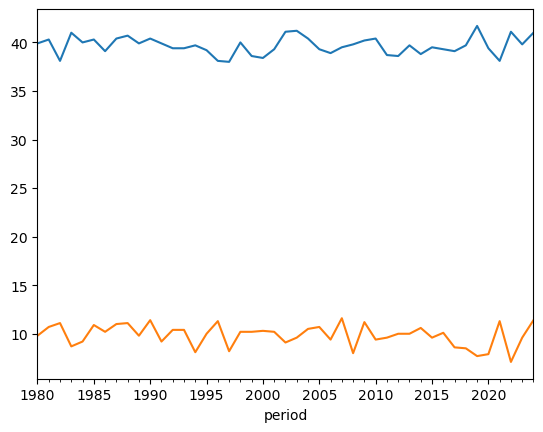

In [414]:
# We can use the period to group our data
# Let's find the average monthly temperature in our weather data
df['period'] = df['time'].dt.to_period('Y')
year_temp = df['temperature'].groupby(by=df['period']).max()

# We can use the period to group our data
# Let's find the average monthly temperature in our weather data
df['period'] = df['time'].dt.to_period('Y')
min_year_temp = df['temperature'].groupby(by=df['period']).min()

year_temp.plot()
min_year_temp.plot()

In [123]:
# Your code
#we need year and weather 

In [416]:
# Your plot here

## Resampling and Frequency Conversion

But what if you had data that was missing some measurements or data that contained too many measurements? In these cases you want to use resampling. Resampling is the process of changing the frequency of your time series data. It lets you:

- Downsample: Convert high-frequency data (e.g., minute-level) to lower frequency (e.g., daily), usually by aggregating.
- Upsample: Convert lower-frequency data (e.g., daily) to higher frequency (e.g., hourly), often by filling or interpolating values.


Pandas has the `.resample` method to help us with this process. It is similar to `.groupby()` in that it requires a way to aggregate the data before you get back a data frame.

NOTE - your data frame must have a a datetime-like index such as:

- DatetimeIndex
- PeriodIndex
- TimedeltaIndex

for resample to work. It always uses the index values

### Downsampling

Downsampling is converting from higher frequency to lower frequency.

In [4]:
# Let's downsample to get data only yearly
# I will look at just a small number of columns
cols = ['temperature', 'precipitation (mm)','pressure_msl (hPa)']
sample = df[cols].resample('YE')
sample

NameError: name 'df' is not defined

At this point pandas is ready to return the information but needs to know how to combine the groups. In this case let's return the average values.

In [52]:
sample.mean()

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-12-31,24.356102,0.110485,1010.529747
1981-12-31,23.947911,0.085708,1010.829463
1982-12-31,24.227135,0.065902,1010.827865
1983-12-31,23.598048,0.102968,1010.632032
1984-12-31,24.194832,0.079019,1009.644661
1985-12-31,24.358311,0.063299,1009.597215
1986-12-31,24.334372,0.080046,1010.297272
1987-12-31,24.659235,0.067500,1010.942146
1988-12-31,24.273122,0.123440,1009.927334


In [18]:
# We could also downsample to every 2 hours
sample = df[cols].resample('ME')
sample

NameError: name 'df' is not defined

In [54]:
sample.max()

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-01-01 00:00:00,12.9,0.0,1012.8
1980-01-01 02:00:00,15.9,0.0,1013.5
1980-01-01 04:00:00,21.7,0.0,1014.9
1980-01-01 06:00:00,24.0,0.0,1014.6
1980-01-01 08:00:00,25.1,0.0,1012.3
...,...,...,...
2024-06-06 14:00:00,28.3,0.0,1008.5
2024-06-06 16:00:00,27.1,0.0,1009.7
2024-06-06 18:00:00,25.4,0.0,1010.1


There are lots of ways to play with the data using sampling!!

**Open-high-low-close** resampling

In finance, often we want to compute four important values:

| Term      | Meaning                          |
| --------- | -------------------------------- |
| **Open**  | First price in the time window   |
| **High**  | Highest price in the time window |
| **Low**   | Lowest price in the time window  |
| **Close** | Last price in the time window    |

Pandas has a function for this called `.ohlc()`. Let's see what this does with our temperature data on a daily frequency.


In [55]:
sample = df['temperature'].resample('D')
sample.ohlc()

,open,high,low,close
time,,,,
1980-01-01,12.7,25.1,12.7,16.6
1980-01-02,16.9,24.8,14.2,14.2
1980-01-03,14.0,24.9,13.6,14.6
1980-01-04,14.7,26.3,14.6,16.7
1980-01-05,16.5,25.0,16.3,16.3
...,...,...,...,...
2024-06-02,24.2,36.4,24.2,24.6
2024-06-03,24.2,35.2,24.2,24.7
2024-06-04,24.3,33.4,24.3,24.7


### Upsampling

When we did a downsample we had to aggregate the data so that many rows are grouped into one. Upsampling is converting from lower frequency to higher frequency. When we upsample we have to add new rows and decide how we might fill them in.


| Method        | Code Example                     | Use Case                                |
| ------------- | -------------------------------- | --------------------------------------- |
| Forward fill  | `df.resample('H').ffill()`       | Stock prices, step functions            |
| Backward fill | `df.resample('H').bfill()`       | Data where future value applies earlier |
| Interpolate   | `df.resample('H').interpolate()` | Continuous numeric data                 |
| As-is (NaN)   | `df.resample('H').asfreq()`      | When you want to leave gaps             |

Let's start with our weather data, but pretend like we only know the values monthly:

In [56]:
df_example = df[cols].resample('W').mean()
df_example

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-01-06,19.700694,0.000000,1013.974306
1980-01-13,21.870833,0.000000,1014.763690
1980-01-20,22.191667,0.000000,1015.580357
1980-01-27,21.085119,0.000000,1014.163095
1980-02-03,19.227976,0.000000,1012.789881
...,...,...,...
2024-05-12,29.873214,0.037500,1008.893452
2024-05-19,30.752381,0.018452,1008.017262
2024-05-26,31.583929,0.001786,1003.758333


Here we are pretending that we don't know the original data - these are our only observations! Now what if we wanted to expand this data to daily observations?

The first cell will look the same as everything above! We just changed our sample from WEEK to DAY

In [57]:
sample = df_example.resample('D')
sample

In [58]:
# Now we need to aggregate - or interpolate
sample.asfreq().head(15)

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-01-06,19.700694,0.0,1013.974306
1980-01-07,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN
1980-01-10,NaN,NaN,NaN
1980-01-11,NaN,NaN,NaN
1980-01-12,NaN,NaN,NaN
1980-01-13,21.870833,0.0,1014.763690
1980-01-14,NaN,NaN,NaN


The aggregation `.asfreq()` converts to the higher frequency without any aggregation and just inserts NaN where it does not have data. Lets try some of the other methods!

In [59]:
sample.ffill().head(15)

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-01-06,19.700694,0.0,1013.974306
1980-01-07,19.700694,0.0,1013.974306
1980-01-08,19.700694,0.0,1013.974306
1980-01-09,19.700694,0.0,1013.974306
1980-01-10,19.700694,0.0,1013.974306
1980-01-11,19.700694,0.0,1013.974306
1980-01-12,19.700694,0.0,1013.974306
1980-01-13,21.870833,0.0,1014.763690
1980-01-14,21.870833,0.0,1014.763690


In [60]:
sample.interpolate().head(15)

,temperature,precipitation (mm),pressure_msl (hPa)
time,,,
1980-01-06,19.700694,0.0,1013.974306
1980-01-07,20.010714,0.0,1014.087075
1980-01-08,20.320734,0.0,1014.199844
1980-01-09,20.630754,0.0,1014.312613
1980-01-10,20.940774,0.0,1014.425383
1980-01-11,21.250794,0.0,1014.538152
1980-01-12,21.560813,0.0,1014.650921
1980-01-13,21.870833,0.0,1014.763690
1980-01-14,21.916667,0.0,1014.880357


## Moving Window Functions

Next we will consider functions that are evaluated over a sliding window to time or evaluated with exponentially decaying weights. Our book calls these "moving window functions"


When analyzing time series data, we often want to extract meaningful trends without being overwhelmed by short-term noise. Two powerful techniques for this are **sliding window functions** and **exponentially weighted functions**.


### Sliding Window Functions (Rolling Windows)

These compute metrics (like `mean`, `sum`, `std`, etc.) over a fixed-size window that "slides" across the time series.

**Use cases:**
- 7-day moving average of temperature
- 30-day rolling volatility of returns
- Smoothing daily sales data

**Why it's useful:**
- Helps observe short-term trends over time
- Reduces the influence of sudden spikes or dips

For this we will use the `.rolling()` method. Instead of looking at the weather data here we will read in the stock data from before, this data is more illustrative of the method and follows the book.



In [421]:
file = 'data/stock_px.csv'

# NOW we can talk about what the extra commands do here!
# parse_dates = True, tells pandas to turn dates into Timestamps
# index_col = 0. sends the first column to be the index
# in this data that means the timestamp is the index and we need that for our methods!
df_stocks = pd.read_csv(file,parse_dates=True,index_col=0)
df_stocks

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


Now we will resample. This data looks to be daily frequency, but maybe we actually want to have the information based on the business day frequency.

| Frequency          | Code  | Includes                                    |
| ------------------ | ----- | ------------------------------------------- |
| **Daily**          | `'D'` | All calendar days (Mon–Sun)                 |
| **Business Daily** | `'B'` | Only weekdays (Mon–Fri) — excludes weekends |


In [423]:
# Resample with a forward fill - some days are missing and we remove weekends.
df_resample = df_stocks.resample('B').ffill()
df_resample

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


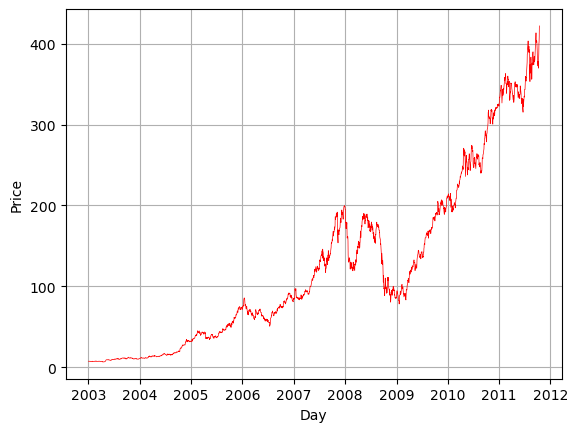

In [425]:
# Plot the data for AAPL
my_col = 'AAPL'


plt.plot(df_resample.index,df_resample[my_col],'r-',linewidth=.5)
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')

plt.show()

We notice how financial data has lots of ups and downs and if we zoom into the data the change from one day to the next actually tells us very little. This is why we often use rolling functions to understand the data. Here we will calculate a rolling average and plot it with the data.

Here we will calculate a mean over a 250 day window. You have to choose what window to use! As the window slides across the timeseries the data on the right becomes part of the average and the data from the left leaves the average.

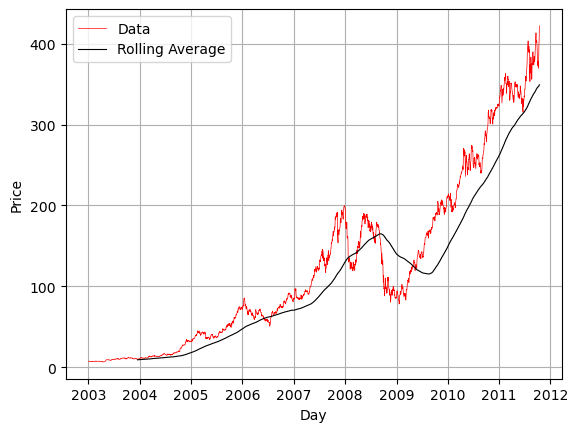

In [64]:
rolling_ave = df_resample[my_col].rolling(250).mean()

plt.plot(df_resample.index,df_resample[my_col],'r-',linewidth=.5,label='Data')
plt.plot(df_resample.index,rolling_ave,'k-',linewidth=.8,label='Rolling Average')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

plt.show()

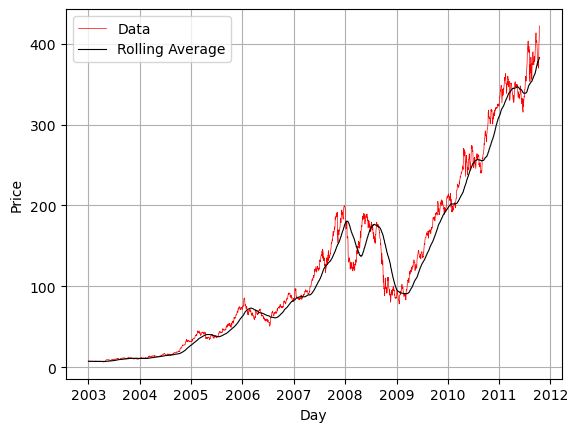

In [65]:
# Do a rolling average of 100 days
rolling_ave = df_resample[my_col].rolling('100D').mean()

plt.plot(df_resample.index,df_resample[my_col],'r-',linewidth=.5,label='Data')
plt.plot(df_resample.index,rolling_ave,'k-',linewidth=.8,label='Rolling Average')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

plt.show()

By default `.rolling()` cannot deal with NaN values. However there is an optional flag `min_periods=' which lets you specify the minumum number of non-nan values that can be used to calculate. This way NaNs can be dropped.

Sometimes instead of a rolling window, you want an expanding window. For example we could calculate the average as we expand our data over time. In this case the right edge of the window expands to include more data in the average.

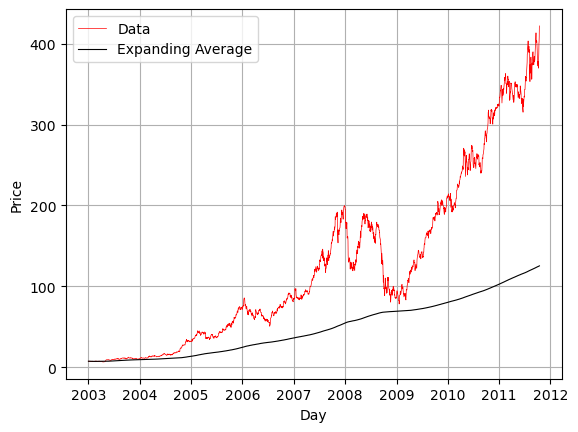

In [66]:
expand_ave = df_resample[my_col].expanding().mean()

plt.plot(df_resample.index,df_resample[my_col],'r-',linewidth=.5,label='Data')
plt.plot(df_resample.index,expand_ave,'k-',linewidth=.8,label='Expanding Average')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

plt.show()

### Exponentially Weighted Functions (EWM)

These compute statistics using exponentially decaying weights, giving more importance to more recent data points.

**Use cases:**
- Real-time trend tracking (e.g., financial indicators)
- Adaptive smoothing for changing behavior
- Faster reaction to recent changes compared to rolling averages

**Why it's useful:**
- More responsive to recent data
- Does not require a fixed window size
- Better suited for evolving or rapidly changing data

In Pandas we will use the `ewm()` exponentially weighted moving function. Here we thing of applying a decay factor based on the span which determines how much memory the ewm has. Often we combine exponential weighting with moving average so that the most recent data has more of an impact on the outcome.

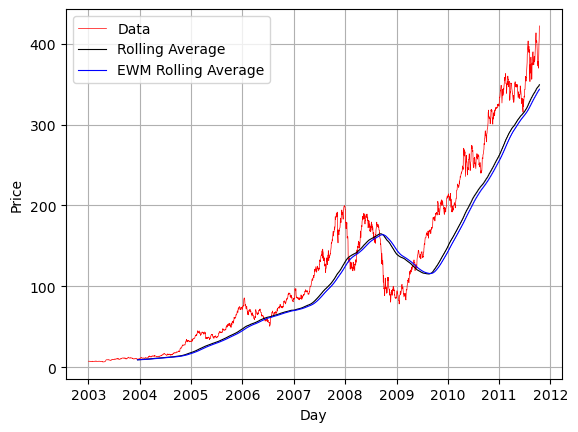

In [427]:
rolling_ave = df_resample[my_col].rolling(250).mean()

# We apply the exponential weighting to the rolling data
# Here we use a span of 30 days.
ewm_rolling_ave = rolling_ave.ewm(span=30).mean()

plt.plot(df_resample.index,df_resample[my_col],'r-',linewidth=.5,label='Data')
plt.plot(df_resample.index,rolling_ave,'k-',linewidth=.8,label='Rolling Average')
plt.plot(df_resample.index,ewm_rolling_ave,'b-',linewidth=.8,label='EWM Rolling Average')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

plt.show()

### Binary Moving Window Functions

When you are calculating things that need more than one set of timeseries data, for example correlation or covariance, you need to send in additional data into the functions. Here we will plot the correlation between the percent change in the stock price of 'AAPL' compared to the percent change in the benchmark index 'SPX'

In [442]:
# Get the percent changes
pcng_spx = df_resample['SPX'].pct_change()
pcng_aapl = df_resample['AAPL'].pct_change()


In [491]:
# Now calculate the correlation
corr = pcng_aapl.rolling(300).corr(pcng_spx)

In [456]:
pcng_msft = df_resample['MSFT'].pct_change()
pcng_xom = df_resample['XOM'].pct_change()

In [489]:
corr_two = pcng_msft.rolling(300).corr(pcng_xom)

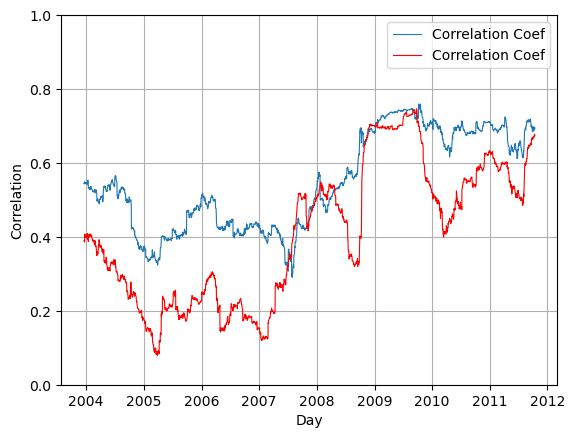

In [466]:
plt.plot(df_resample.index,corr,corr_two,'r-',linewidth=.8,label='Correlation Coef')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Correlation')
plt.legend()
plt.ylim([0,1])

plt.show()

## You Try

Add the other two stocks to the correlation graph above. Make sure to label the graph clearly and make it look nice! Experiment with different values for your moving average window. What happens when you change this and why?

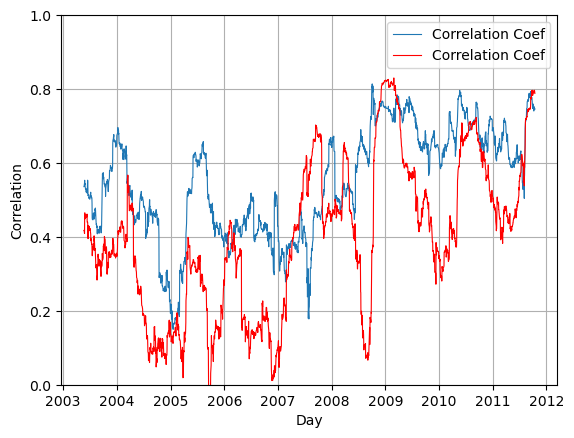

In [487]:
# Your code here
plt.plot(df_resample.index,corr,corr_two,'r-',linewidth=.8,label='Correlation Coef')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Correlation')
plt.legend()
plt.ylim([0,1])

plt.show()